<a href="https://colab.research.google.com/github/2303A51589/pythonDS/blob/main/finalcodeIEEEE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv("/content/ai_job_trends_dataset.csv")
df.head()


,Job Title,Industry,Job Status,AI Impact Level,Median Salary (USD),Required Education,Experience Required (Years),Job Openings (2024),Projected Openings (2030),Remote Work Ratio (%),Automation Risk (%),Location,Gender Diversity (%)
0,Investment analyst,IT,Increasing,Moderate,42109.76,Master’s Degree,5,1515,6342,55.96,28.28,UK,44.63
1,"Journalist, newspaper",Manufacturing,Increasing,Moderate,132298.57,Master’s Degree,15,1243,6205,16.81,89.71,USA,66.39
2,Financial planner,Finance,Increasing,Low,143279.19,Bachelor’s Degree,4,3338,1154,91.82,72.97,Canada,41.13
3,Legal secretary,Healthcare,Increasing,High,97576.13,Associate Degree,15,7173,4060,1.89,99.94,Australia,65.76
4,Aeronautical engineer,IT,Increasing,Low,60956.63,Master’s Degree,13,5944,7396,53.76,37.65,Germany,72.57


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Job Title                    30000 non-null  object 
 1   Industry                     30000 non-null  object 
 2   Job Status                   30000 non-null  object 
 3   AI Impact Level              30000 non-null  object 
 4   Median Salary (USD)          30000 non-null  float64
 5   Required Education           30000 non-null  object 
 6   Experience Required (Years)  30000 non-null  int64  
 7   Job Openings (2024)          30000 non-null  int64  
 8   Projected Openings (2030)    30000 non-null  int64  
 9   Remote Work Ratio (%)        30000 non-null  float64
 10  Automation Risk (%)          30000 non-null  float64
 11  Location                     30000 non-null  object 
 12  Gender Diversity (%)         30000 non-null  float64
dtypes: float64(4), i

In [6]:
df.nunique()

,0
Job Title,639
Industry,8
Job Status,2
AI Impact Level,3
Median Salary (USD),29968
Required Education,5
Experience Required (Years),21
Job Openings (2024),9439
Projected Openings (2030),9410
Remote Work Ratio (%),9466


In [7]:
df.describe()

,Median Salary (USD),Experience Required (Years),Job Openings (2024),Projected Openings (2030),Remote Work Ratio (%),Automation Risk (%),Gender Diversity (%)
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,90119.965639,10.051433,5039.640833,5074.218100,49.836431,50.154229,49.979660
std,34412.013953,6.060678,2861.009654,2866.550722,28.966688,28.754889,17.274665
min,30001.860000,0.000000,100.000000,100.000000,0.000000,0.000000,20.000000
25%,60500.702500,5.000000,2570.000000,2586.750000,24.570000,25.400000,35.070000
50%,90274.115000,10.000000,5034.000000,5106.500000,49.570000,50.020000,49.885000
75%,119454.710000,15.000000,7527.000000,7573.000000,75.100000,75.030000,64.910000
max,149998.500000,20.000000,10000.000000,10000.000000,100.000000,99.990000,80.000000


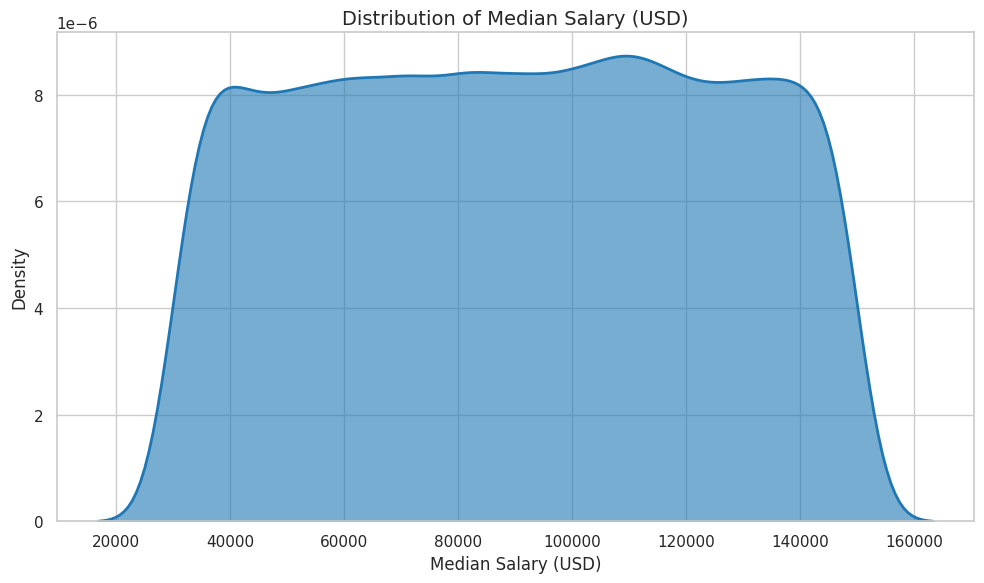

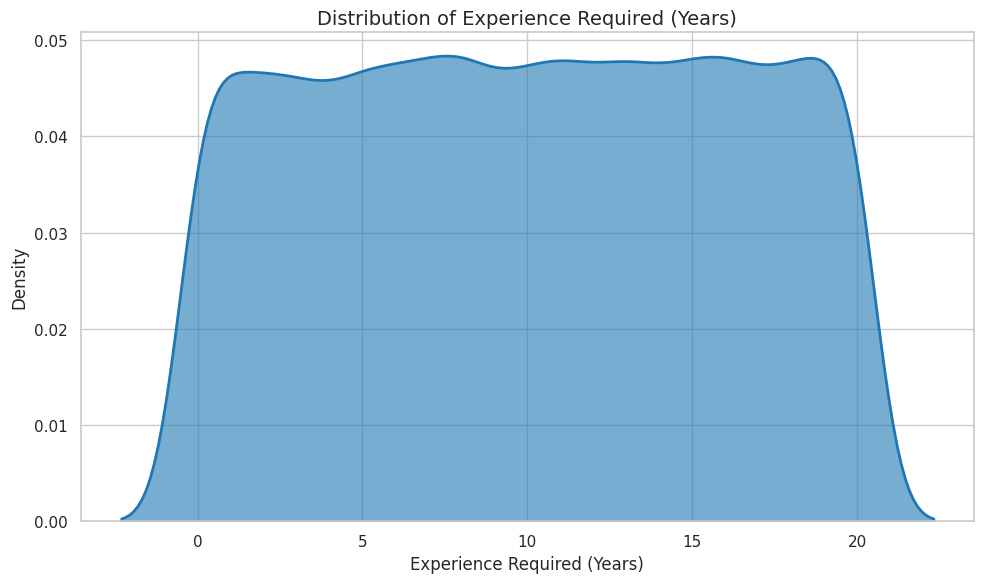

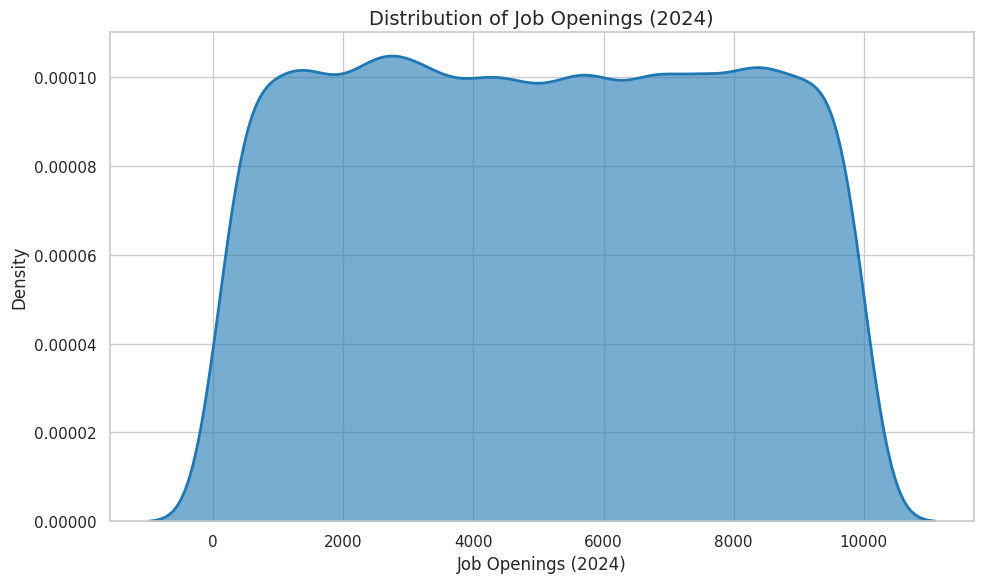

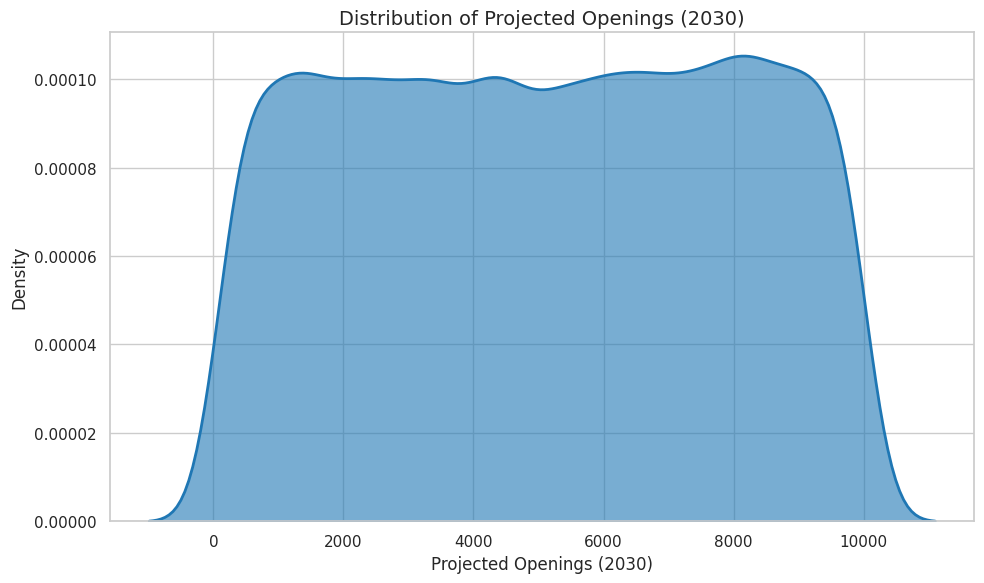

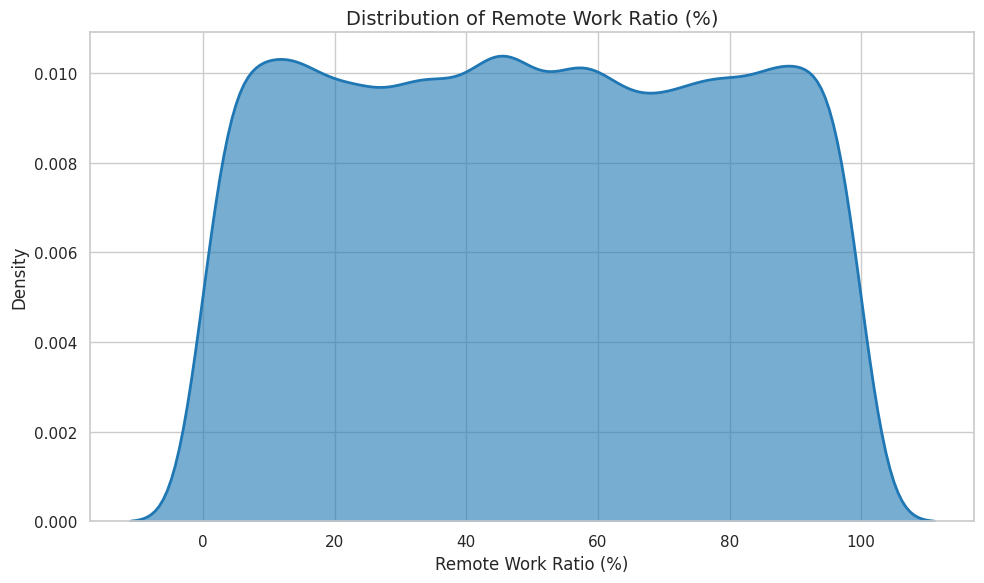

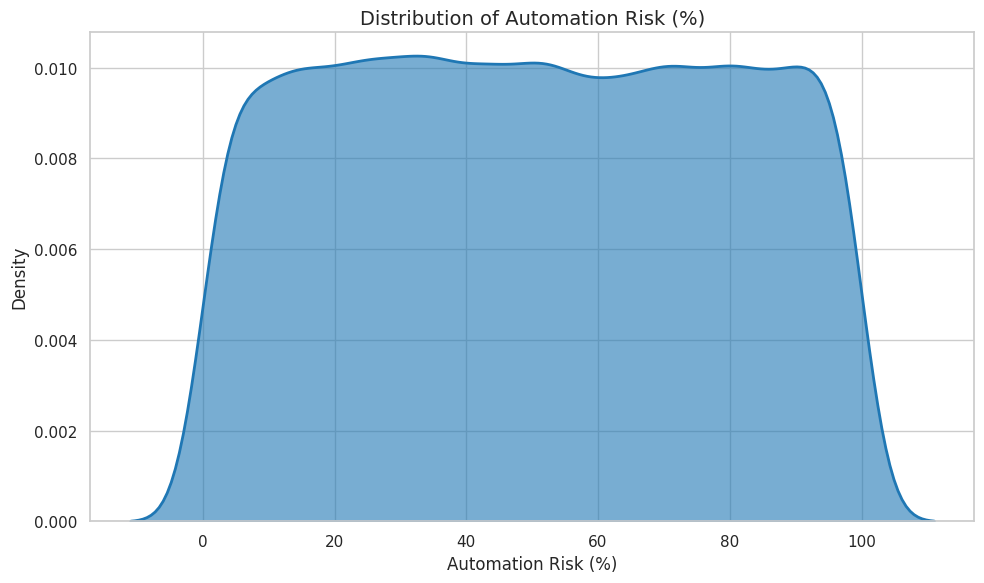

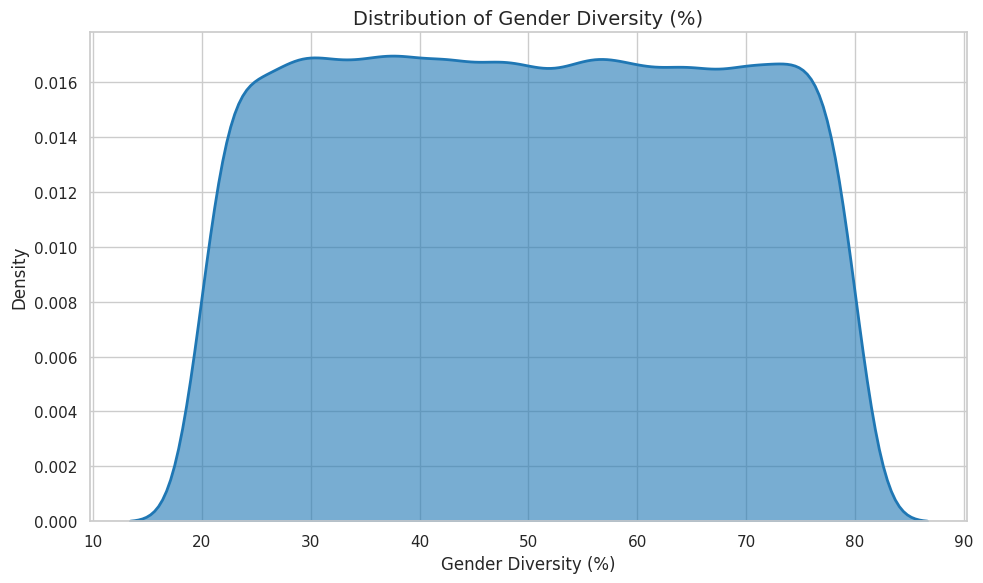

In [8]:
# Variables to visualize
columns = [
    "Median Salary (USD)",
    "Experience Required (Years)",
    "Job Openings (2024)",
    "Projected Openings (2030)",
    "Remote Work Ratio (%)",
    "Automation Risk (%)",
    "Gender Diversity (%)"
]

# Remove missing values in the selected columns
df_clean = df[columns].dropna()

# Set Seaborn plot style
sns.set(style="whitegrid")

# Create KDE plot for each variable
for col in columns:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(
        data=df_clean,
        x=col,
        fill=True,
        color="#1f77b4",
        alpha=0.6,
        linewidth=2
    )
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.tight_layout()
    plt.show()

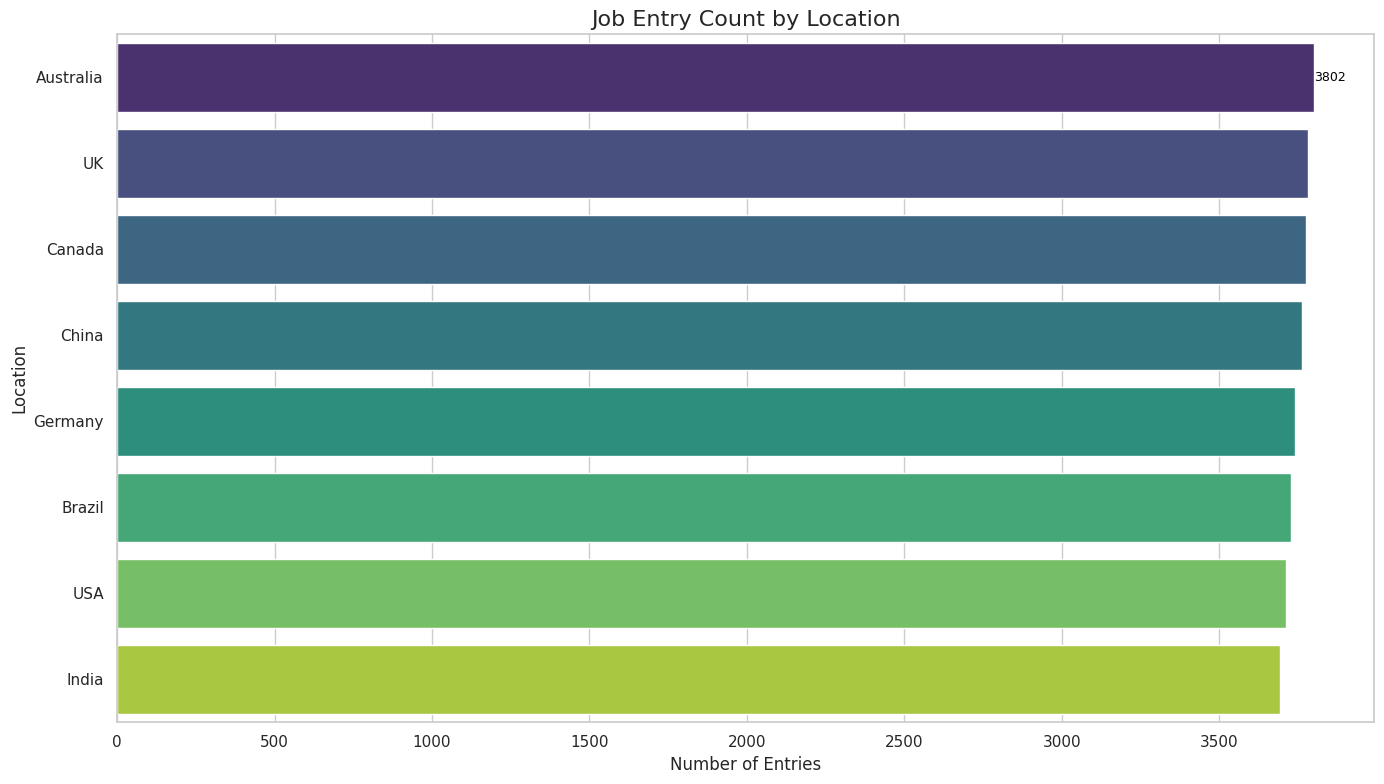

In [9]:
# Drop missing location values
df_clean = df.dropna(subset=["Location"])

# Count job entries per location
location_counts = df_clean["Location"].value_counts().reset_index()
location_counts.columns = ["Location", "Count"]

# Sort for better visual layout
location_counts_sorted = location_counts.sort_values("Count", ascending=False)

# Set style and figure size
sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))

# Plot horizontal bar chart
barplot = sns.barplot(
    data=location_counts_sorted,
    x="Count",
    y="Location",
    palette="viridis"
)

# Add count labels
barplot.bar_label(barplot.containers[0], fmt='%.0f', label_type='edge', fontsize=9, color='black')

# Customize plot
plt.title("Job Entry Count by Location", fontsize=16)
plt.xlabel("Number of Entries", fontsize=12)
plt.ylabel("Location", fontsize=12)
plt.tight_layout()
plt.show()


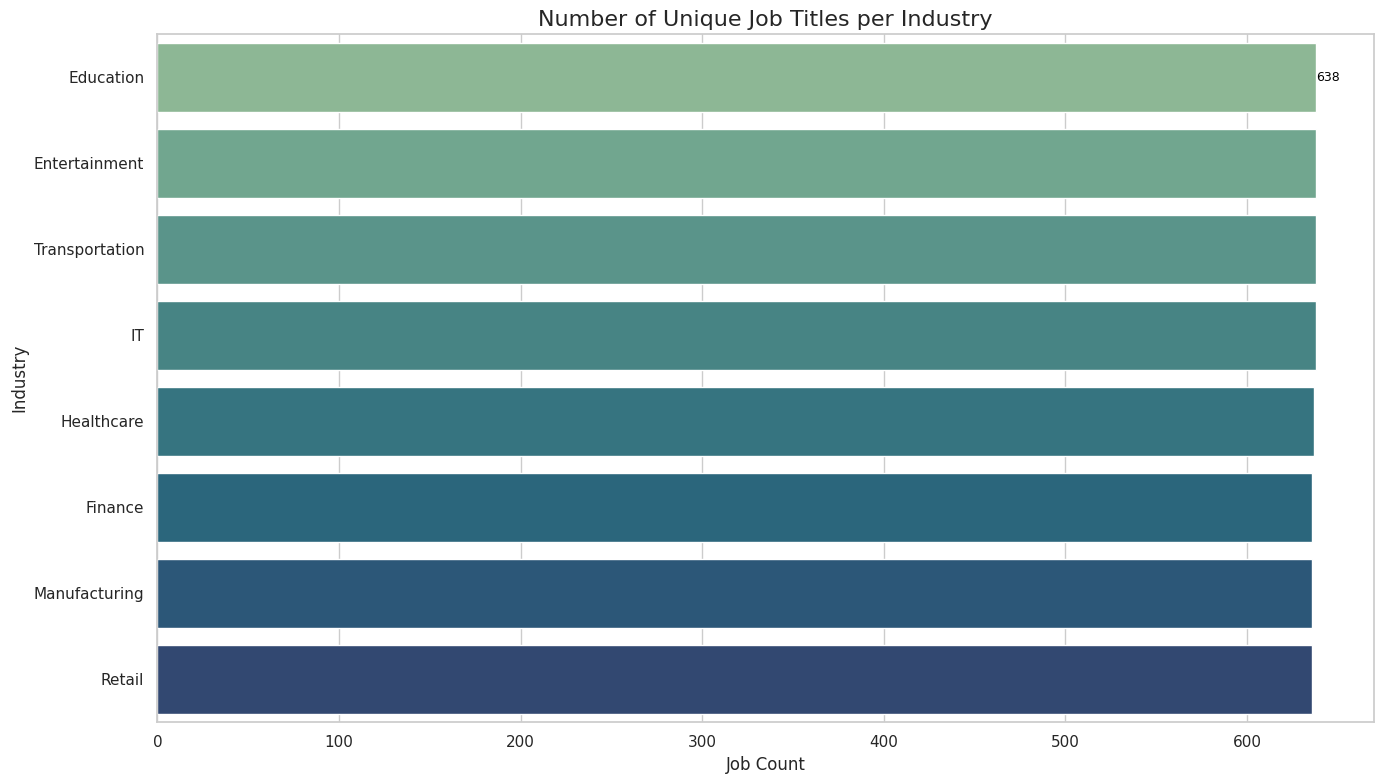

In [10]:
# Drop rows with missing Industry or Job Title
df_clean = df.dropna(subset=["Industry", "Job Title"])

# Count number of unique job titles per industry
industry_job_counts = df_clean.groupby("Industry")["Job Title"].nunique().reset_index()
industry_job_counts.columns = ["Industry", "Job Count"]

# Sort industries by number of job titles
industry_job_counts_sorted = industry_job_counts.sort_values("Job Count", ascending=False)

# Set style and figure size
sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))

# Plot horizontal bar chart
barplot = sns.barplot(
    data=industry_job_counts_sorted,
    x="Job Count",
    y="Industry",
    palette="crest"
)

# Add count labels to bars
barplot.bar_label(barplot.containers[0], fmt='%.0f', label_type='edge', fontsize=9, color='black')

# Add title and axis labels
plt.title("Number of Unique Job Titles per Industry", fontsize=16)
plt.xlabel("Job Count", fontsize=12)
plt.ylabel("Industry", fontsize=12)
plt.tight_layout()
plt.show()


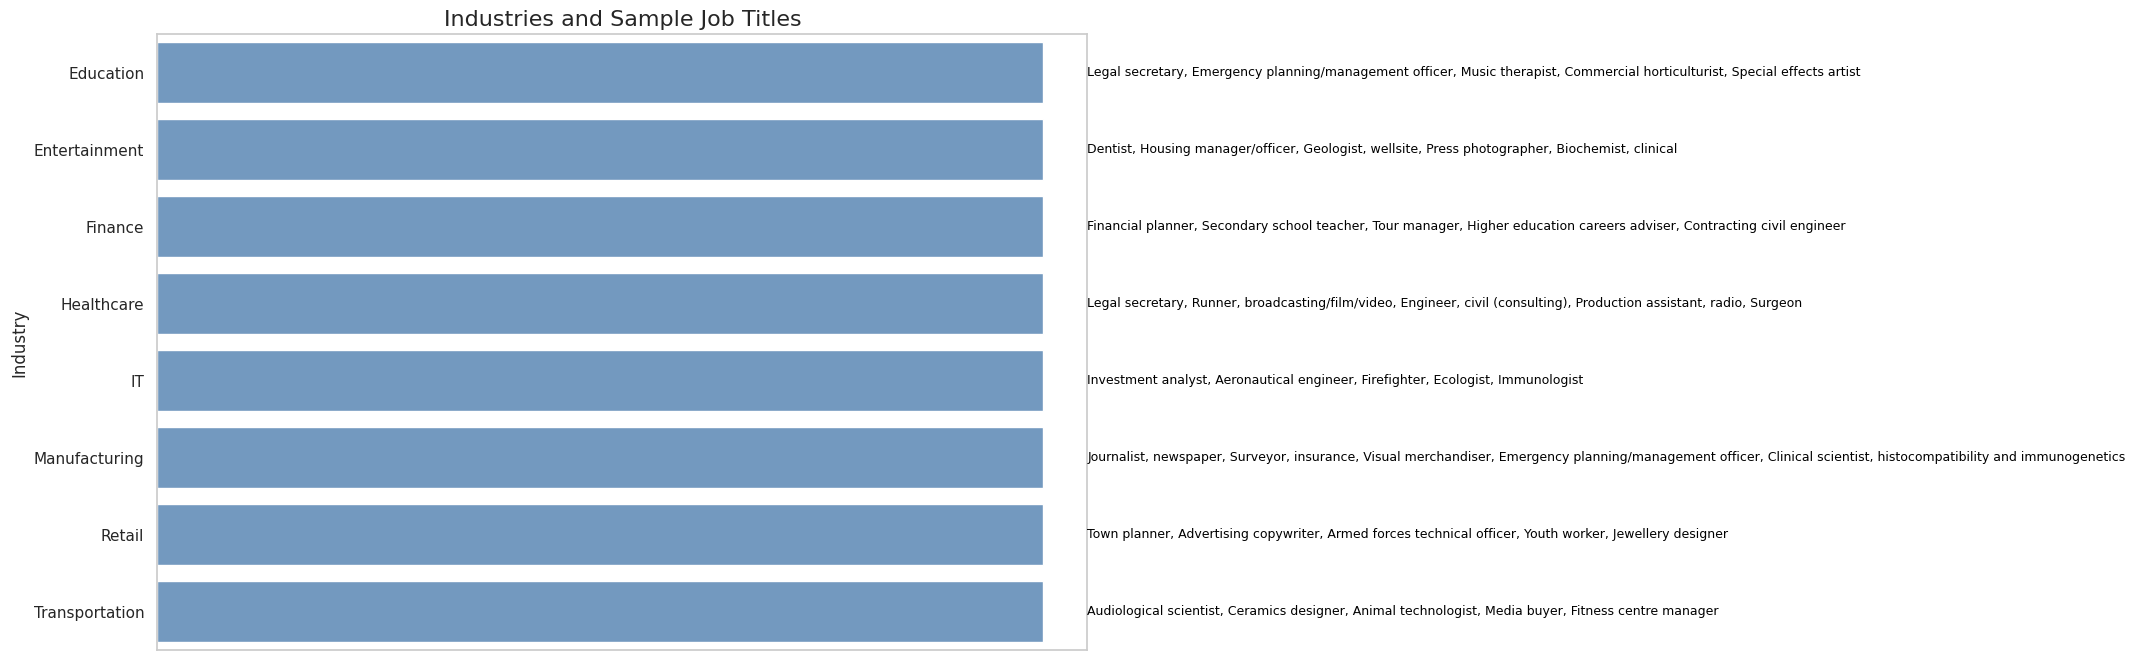

In [11]:
# Clean data: remove missing values
df_clean = df.dropna(subset=["Industry", "Job Title"])

# Group job titles per industry and join the first few into a readable string
industry_jobs = df_clean.groupby("Industry")["Job Title"].unique().reset_index()
industry_jobs["Job Titles"] = industry_jobs["Job Title"].apply(lambda titles: ", ".join(titles[:5]))

# Add a dummy value for plotting (all bars same length just to display job title labels)
industry_jobs["Count"] = 1

# Sort industries alphabetically for layout
industry_jobs_sorted = industry_jobs.sort_values("Industry")

# Create horizontal bar plot with job titles as annotations
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

barplot = sns.barplot(
    data=industry_jobs_sorted,
    x="Count",
    y="Industry",
    color="#6699cc"
)

# Add job title labels next to each bar
for index, row in industry_jobs_sorted.iterrows():
    plt.text(
        x=row["Count"] + 0.05,
        y=index,
        s=row["Job Titles"],
        va='center',
        fontsize=9,
        color='black'
    )

# Hide x-axis ticks since "Count" is just placeholder
plt.xticks([])
plt.xlabel("")
plt.title("Industries and Sample Job Titles", fontsize=16)
plt.tight_layout()
plt.show()


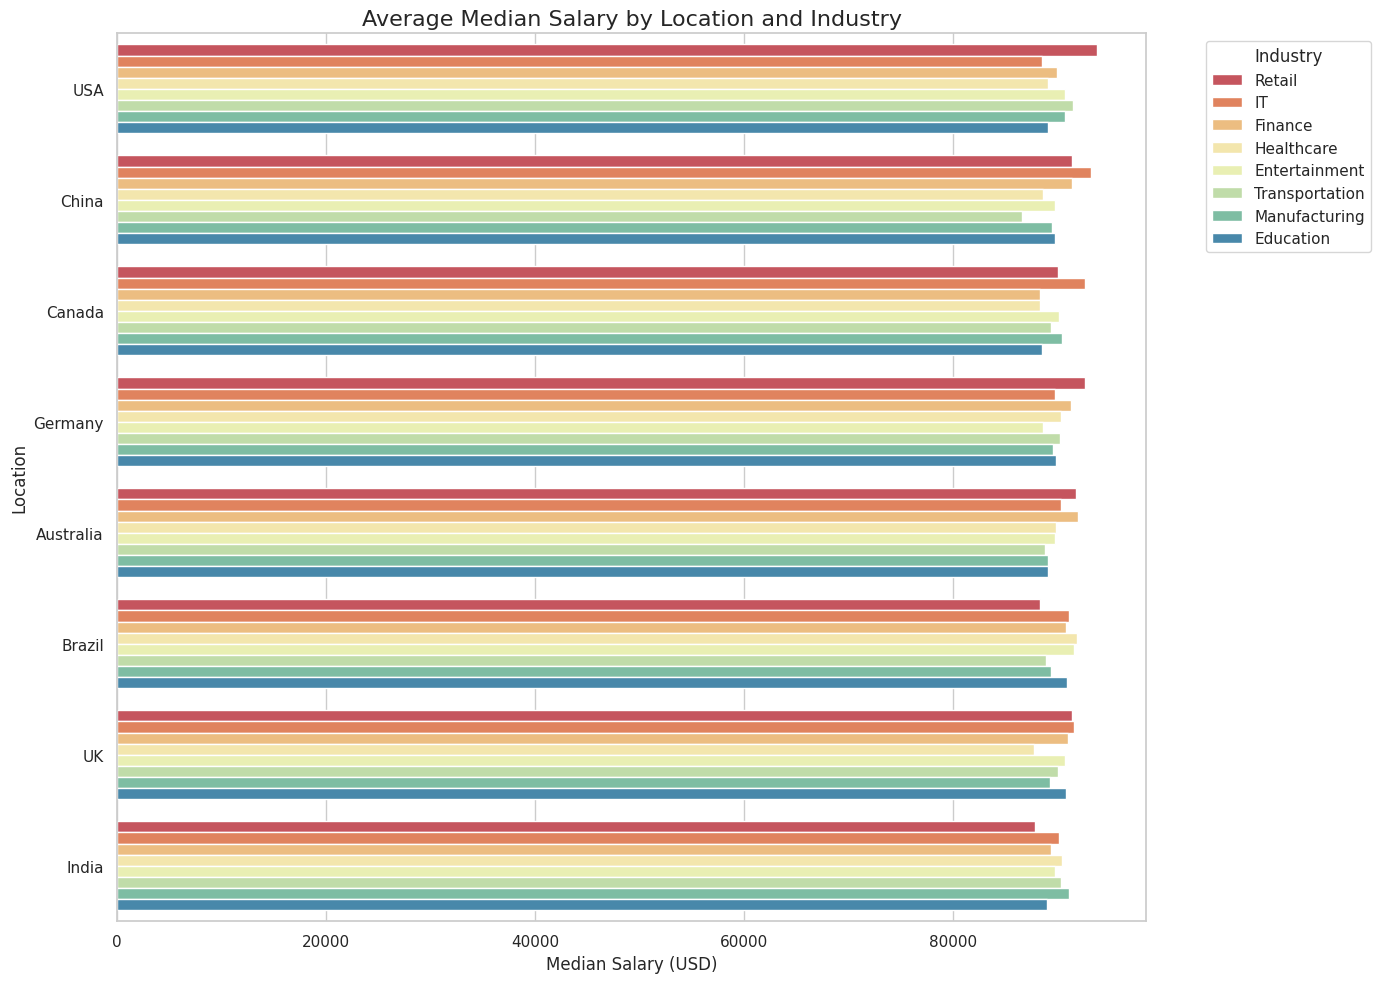

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Drop missing values
df_clean = df.dropna(subset=["Industry", "Location", "Median Salary (USD)"])

# Group by Industry and Location, calculate average median salary
grouped = df_clean.groupby(["Location", "Industry"])["Median Salary (USD)"].mean().reset_index()

# Sort data by salary to improve layout
grouped_sorted = grouped.sort_values("Median Salary (USD)", ascending=False)

# Set plot style and size
plt.figure(figsize=(14, 10))
sns.set_style("whitegrid")

# Create grouped barplot
barplot = sns.barplot(
    data=grouped_sorted,
    x="Median Salary (USD)",
    y="Location",
    hue="Industry",
    dodge=True,
    palette="Spectral"
)

# Add labels and title
plt.title("Average Median Salary by Location and Industry", fontsize=16)
plt.xlabel("Median Salary (USD)", fontsize=12)
plt.ylabel("Location", fontsize=12)
plt.legend(title="Industry", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


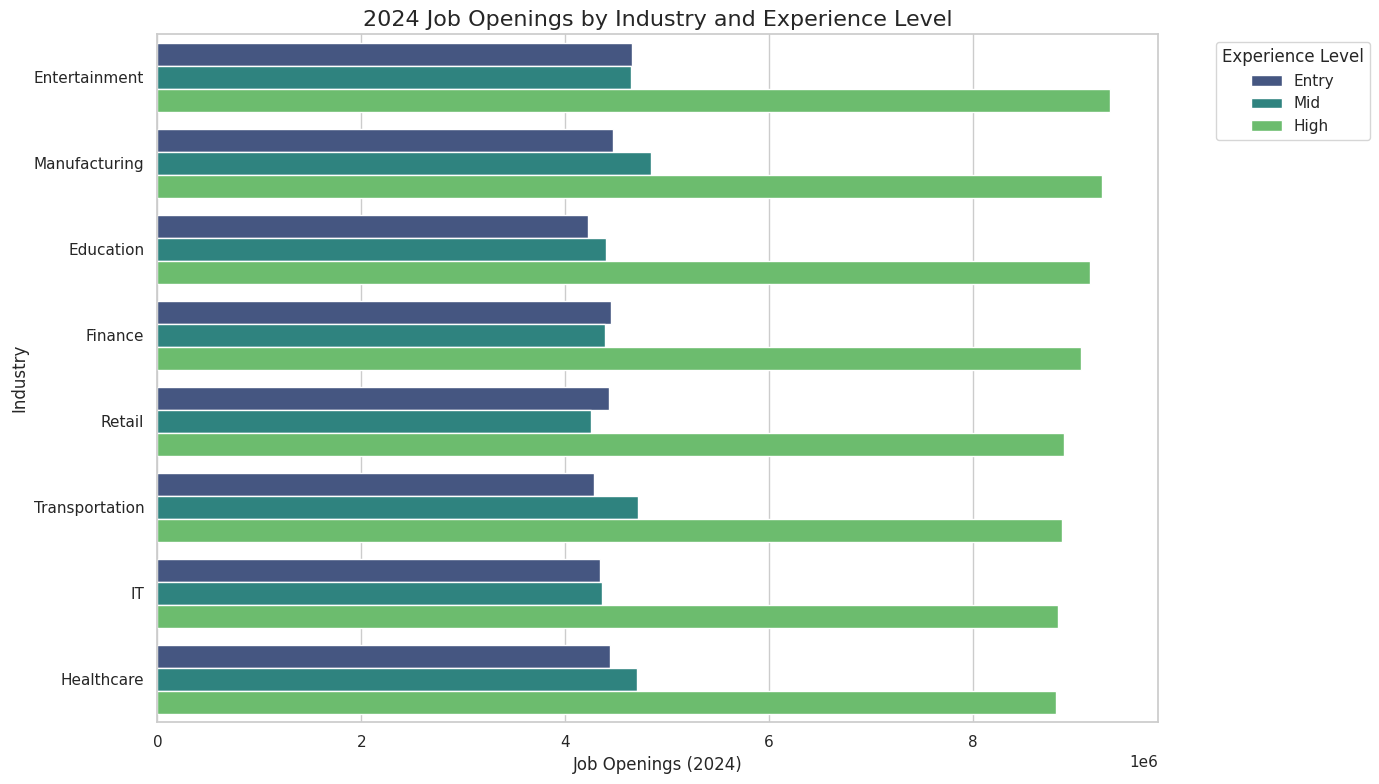

In [13]:
# Drop missing values
df_clean = df.dropna(subset=["Industry", "Experience Required (Years)", "Job Openings (2024)"])

# Define bins and labels
bins = [0, 5, 10, 20]
labels = ["Entry", "Mid", "High"]

# Create Experience Level column
df_clean["Experience Level"] = pd.cut(df_clean["Experience Required (Years)"], bins=bins, labels=labels, right=False)

# Aggregate total job openings by Industry and Experience Level
grouped = df_clean.groupby(["Industry", "Experience Level"])["Job Openings (2024)"].sum().reset_index()

# Sort industries for better layout
grouped_sorted = grouped.sort_values("Job Openings (2024)", ascending=False)

# Set up the plot
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Create grouped bar chart
sns.barplot(
    data=grouped_sorted,
    x="Job Openings (2024)",
    y="Industry",
    hue="Experience Level",
    palette="viridis"
)

# Customize labels and title
plt.title("2024 Job Openings by Industry and Experience Level", fontsize=16)
plt.xlabel("Job Openings (2024)", fontsize=12)
plt.ylabel("Industry", fontsize=12)
plt.legend(title="Experience Level", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()

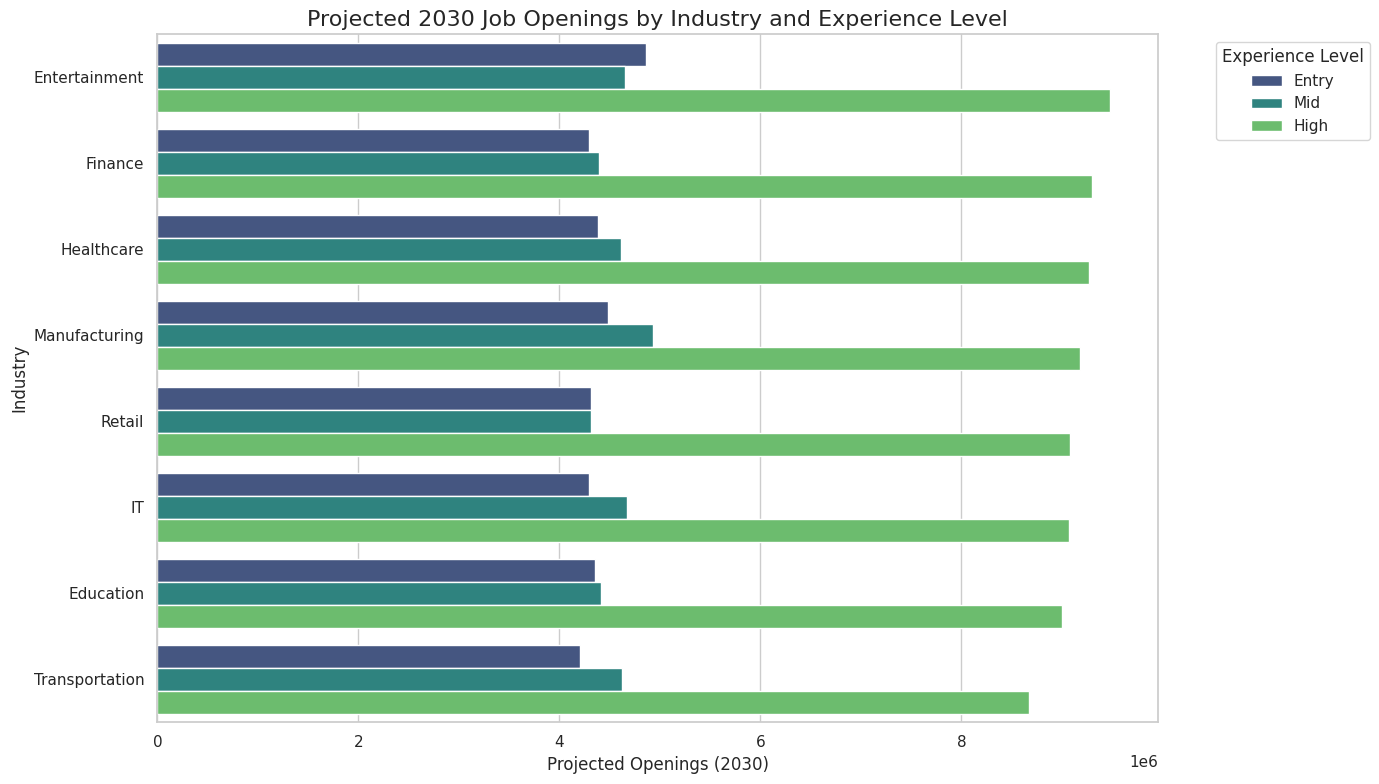

In [14]:
# Drop missing values
df_clean = df.dropna(subset=["Industry", "Experience Required (Years)", "Projected Openings (2030)"])

# Define experience level bins and labels
bins = [0, 5, 10, 20]
labels = ["Entry", "Mid", "High"]

# Create Experience Level column
df_clean["Experience Level"] = pd.cut(df_clean["Experience Required (Years)"], bins=bins, labels=labels, right=False)

# Aggregate projected openings by industry and experience level
grouped = df_clean.groupby(["Industry", "Experience Level"])["Projected Openings (2030)"].sum().reset_index()

# Sort industries by total projected openings
grouped_sorted = grouped.sort_values("Projected Openings (2030)", ascending=False)

# Set up the plot
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Create grouped bar chart
sns.barplot(
    data=grouped_sorted,
    x="Projected Openings (2030)",
    y="Industry",
    hue="Experience Level",
    palette="viridis"
)

# Customize labels and title
plt.title("Projected 2030 Job Openings by Industry and Experience Level", fontsize=16)
plt.xlabel("Projected Openings (2030)", fontsize=12)
plt.ylabel("Industry", fontsize=12)
plt.legend(title="Experience Level", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()

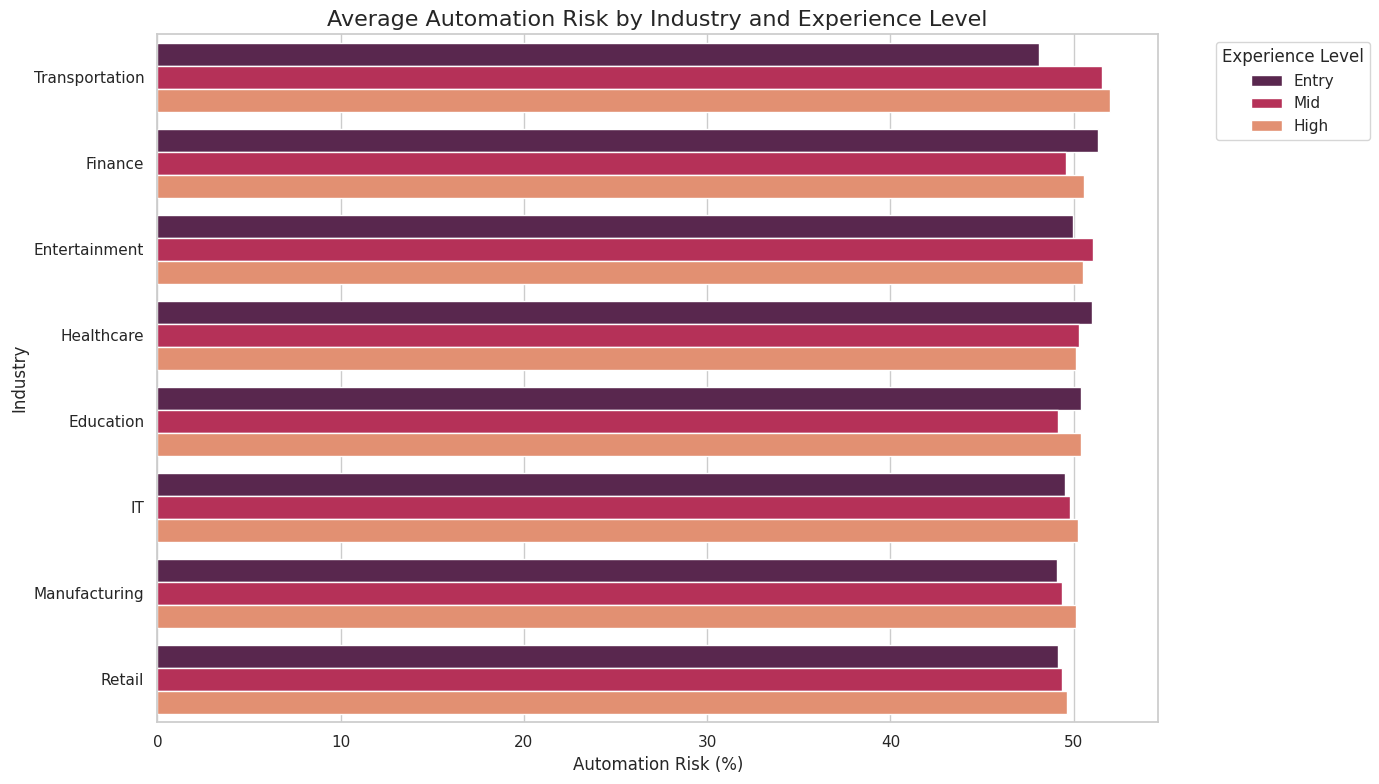

In [15]:
# Drop rows with missing values
df_clean = df.dropna(subset=["Industry", "Experience Required (Years)", "Automation Risk (%)"])

# Define experience level bins
bins = [0, 5, 10, 20]
labels = ["Entry", "Mid", "High"]

# Create Experience Level column
df_clean["Experience Level"] = pd.cut(
    df_clean["Experience Required (Years)"],
    bins=bins,
    labels=labels,
    right=False
)

# Group by Industry and Experience Level, calculate average automation risk
grouped = df_clean.groupby(["Industry", "Experience Level"])["Automation Risk (%)"].mean().reset_index()

# Sort for clear visualization
grouped_sorted = grouped.sort_values("Automation Risk (%)", ascending=False)

# Set plot style and size
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Create grouped bar chart
barplot = sns.barplot(
    data=grouped_sorted,
    x="Automation Risk (%)",
    y="Industry",
    hue="Experience Level",
    palette="rocket"
)

# Add title and labels
plt.title("Average Automation Risk by Industry and Experience Level", fontsize=16)
plt.xlabel("Automation Risk (%)", fontsize=12)
plt.ylabel("Industry", fontsize=12)
plt.legend(title="Experience Level", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


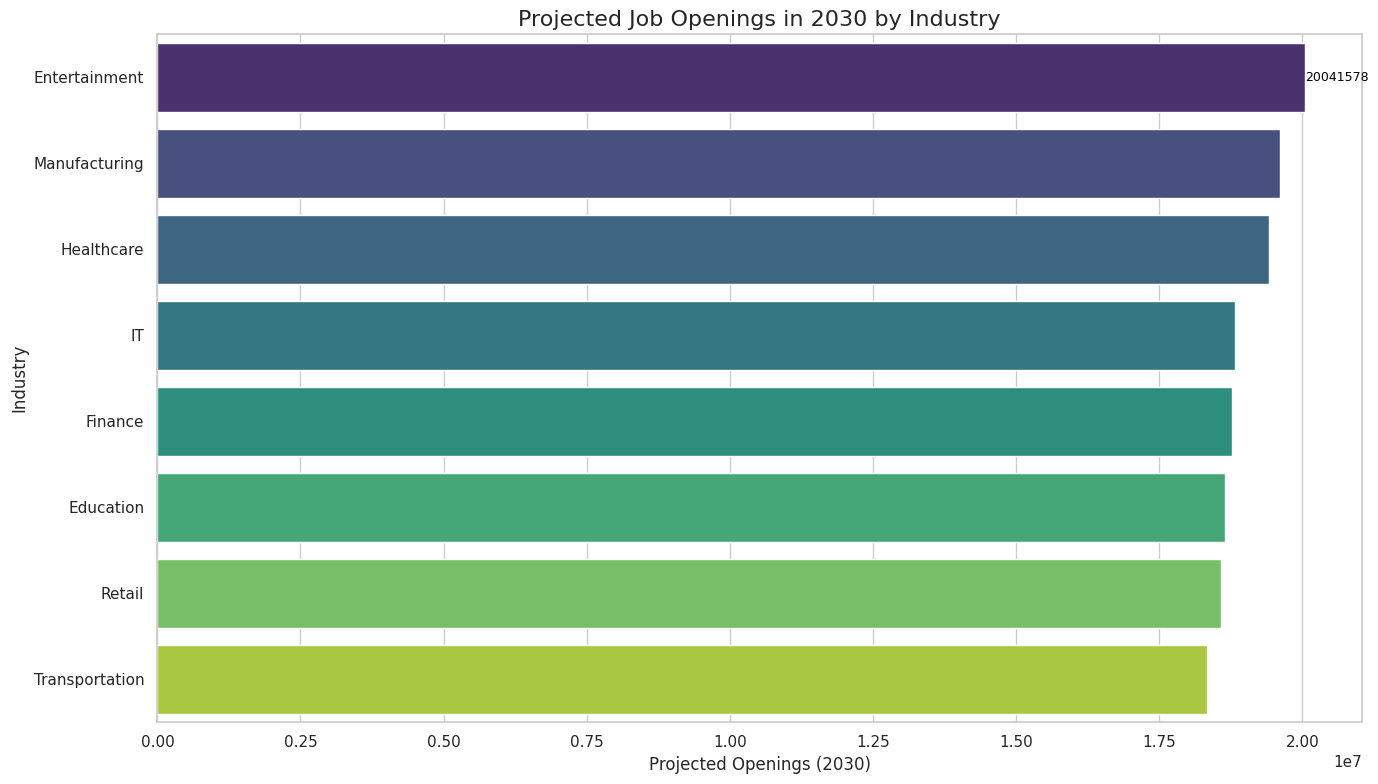

In [16]:
# Remove missing values in relevant columns
df_clean = df.dropna(subset=["Industry", "Projected Openings (2030)"])

# Group by industry and sum the projected openings
grouped = df_clean.groupby("Industry")["Projected Openings (2030)"].sum().reset_index()

# Sort industries by projected openings
grouped_sorted = grouped.sort_values("Projected Openings (2030)", ascending=False)

# Set up plot style and size
sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))

# Create horizontal bar plot
barplot = sns.barplot(
    data=grouped_sorted,
    x="Projected Openings (2030)",
    y="Industry",
    palette="viridis"
)

# Add value labels
barplot.bar_label(barplot.containers[0], fmt='%.0f', label_type='edge', fontsize=9, color='black')

# Customize plot
plt.title("Projected Job Openings in 2030 by Industry", fontsize=16)
plt.xlabel("Projected Openings (2030)", fontsize=12)
plt.ylabel("Industry", fontsize=12)
plt.tight_layout()
plt.show()

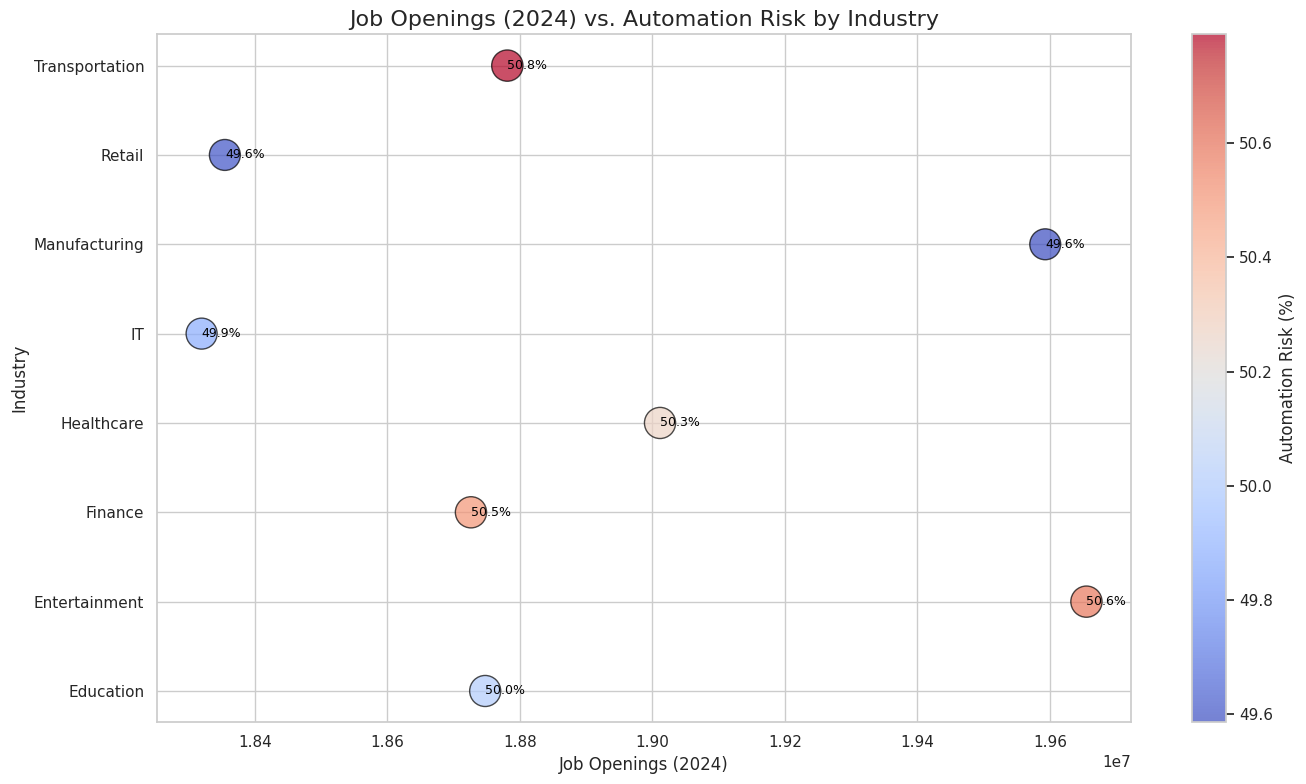

In [17]:
# Clean data
df_clean = df.dropna(subset=["Industry", "Job Openings (2024)", "Automation Risk (%)"])

# Aggregate data by industry
grouped = df_clean.groupby("Industry").agg({
    "Job Openings (2024)": "sum",
    "Automation Risk (%)": "mean"
}).reset_index()

# Plot size
plt.figure(figsize=(14, 8))

# Bubble plot
scatter = plt.scatter(
    x=grouped["Job Openings (2024)"],
    y=grouped["Industry"],
    s=grouped["Automation Risk (%)"] * 10,   # Bubble size
    c=grouped["Automation Risk (%)"],        # Bubble color
    cmap="coolwarm",
    alpha=0.7,
    edgecolors="black"
)

# Add colorbar for automation risk
cbar = plt.colorbar(scatter)
cbar.set_label("Automation Risk (%)")

# Add text labels next to each bubble
for i in range(len(grouped)):
    plt.text(
        x=grouped["Job Openings (2024)"][i] + 30,
        y=grouped["Industry"][i],
        s=f'{grouped["Automation Risk (%)"][i]:.1f}%',
        va='center',
        fontsize=9,
        color='black'
    )

# Titles and axis labels
plt.title("Job Openings (2024) vs. Automation Risk by Industry", fontsize=16)
plt.xlabel("Job Openings (2024)", fontsize=12)
plt.ylabel("Industry", fontsize=12)

plt.tight_layout()
plt.show()


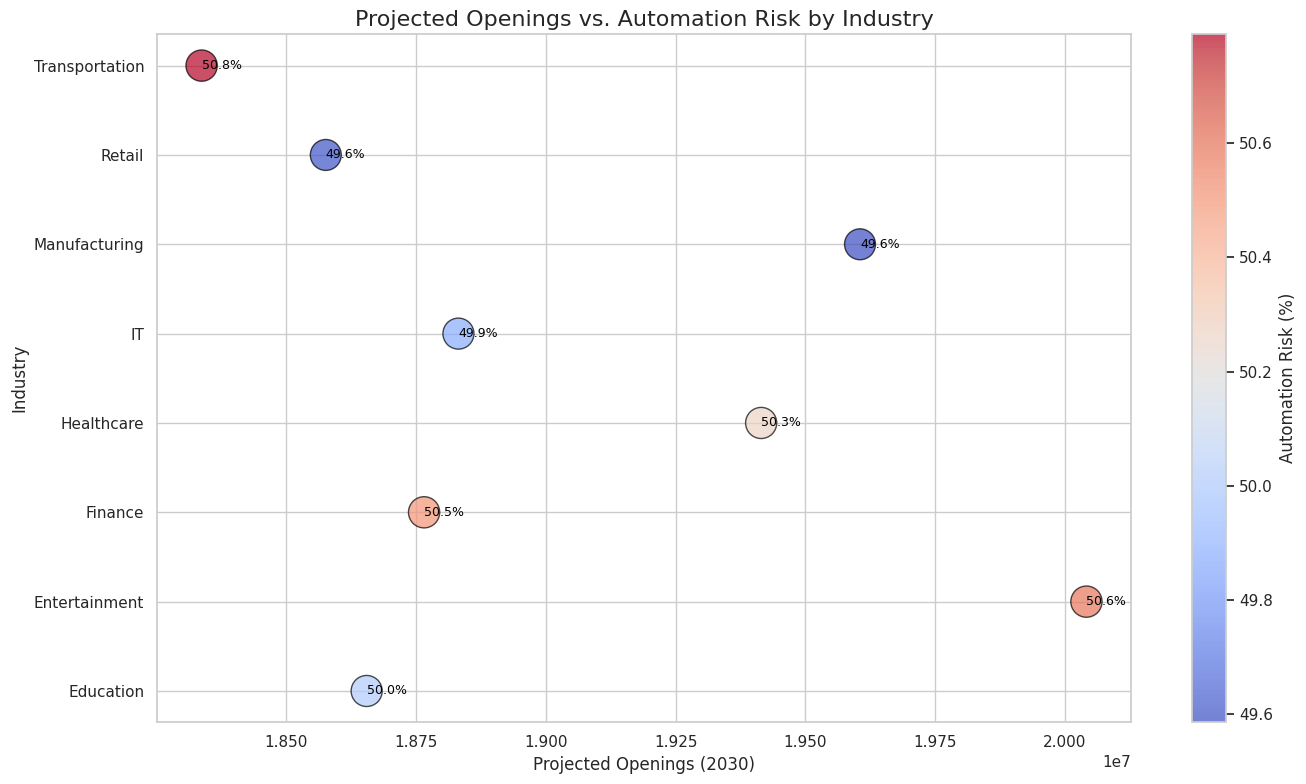

In [20]:
# Clean data
df_clean = df.dropna(subset=["Industry", "Projected Openings (2030)", "Automation Risk (%)"])

# Aggregate data by industry
grouped = df_clean.groupby("Industry").agg({
    "Projected Openings (2030)": "sum",
    "Automation Risk (%)": "mean"
}).reset_index()

# Plot size
plt.figure(figsize=(14, 8))

# Bubble plot
scatter = plt.scatter(
    x=grouped["Projected Openings (2030)"],
    y=grouped["Industry"],
    s=grouped["Automation Risk (%)"] * 10,   # Bubble size
    c=grouped["Automation Risk (%)"],        # Bubble color
    cmap="coolwarm",
    alpha=0.7,
    edgecolors="black"
)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label("Automation Risk (%)")

# Add percentage labels next to each bubble
for i in range(len(grouped)):
    plt.text(
        x=grouped["Projected Openings (2030)"][i] + 30,  # adjust for spacing
        y=grouped["Industry"][i],
        s=f'{grouped["Automation Risk (%)"][i]:.1f}%',
        va='center',
        fontsize=9,
        color='black'
    )

# Titles and labels
plt.title("Projected Openings vs. Automation Risk by Industry", fontsize=16)
plt.xlabel("Projected Openings (2030)", fontsize=12)
plt.ylabel("Industry", fontsize=12)

plt.tight_layout()
plt.show()

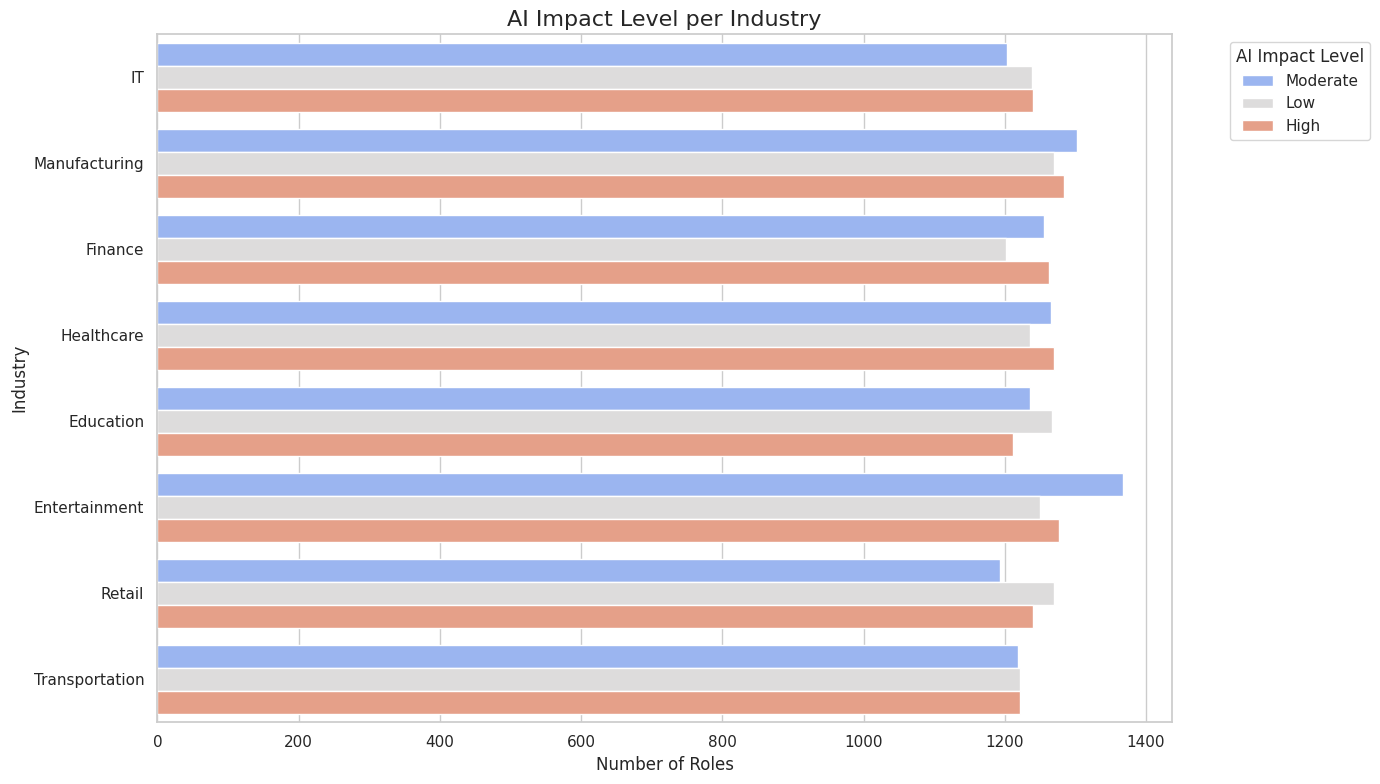

In [21]:
# Drop missing values
df_clean = df.dropna(subset=["Industry", "AI Impact Level"])

# Plot size
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Create count plot to show distribution of AI Impact Level per Industry
sns.countplot(
    data=df_clean,
    y="Industry",
    hue="AI Impact Level",
    palette="coolwarm"
)

# Add labels and title
plt.title("AI Impact Level per Industry", fontsize=16)
plt.xlabel("Number of Roles", fontsize=12)
plt.ylabel("Industry", fontsize=12)
plt.legend(title="AI Impact Level", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

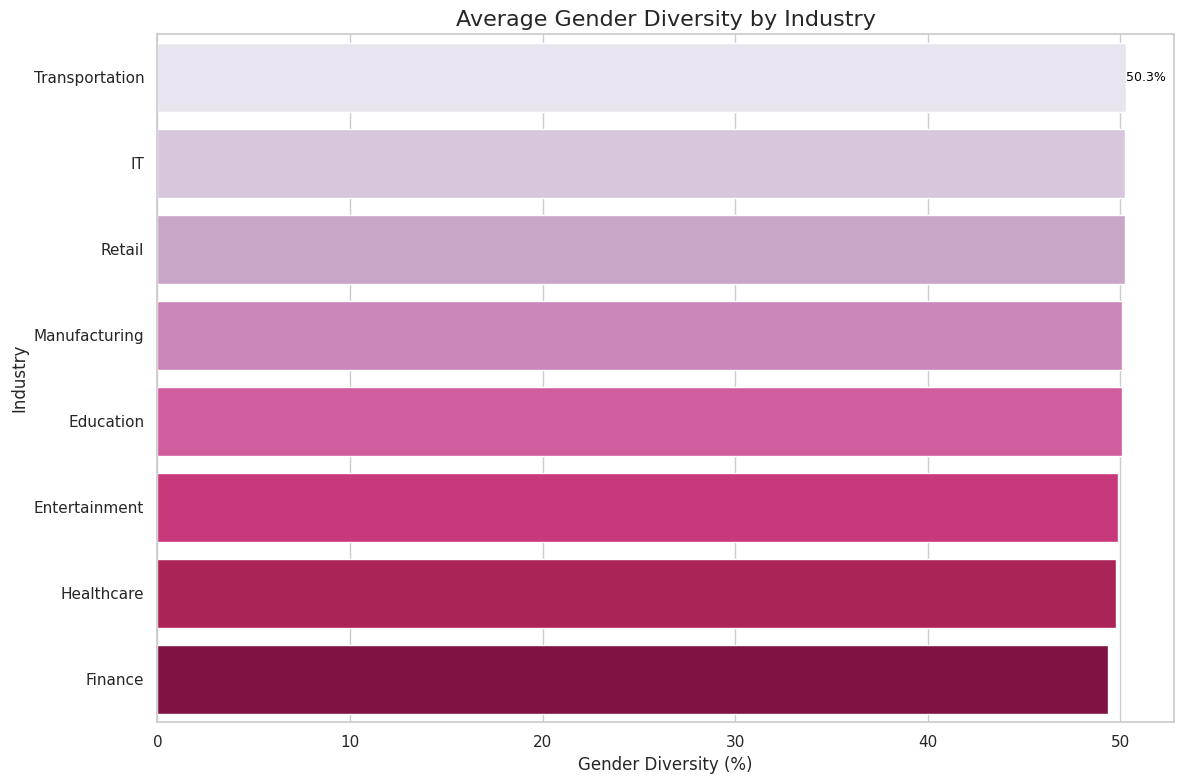

In [22]:
# Clean the dataset
df_clean = df.dropna(subset=["Industry", "Gender Diversity (%)"])

# Group by industry and calculate mean gender diversity
grouped = df_clean.groupby("Industry")["Gender Diversity (%)"].mean().reset_index()

# Sort by diversity descending
grouped_sorted = grouped.sort_values("Gender Diversity (%)", ascending=False)

# Set plot style and size
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Create barplot
barplot = sns.barplot(
    data=grouped_sorted,
    x="Gender Diversity (%)",
    y="Industry",
    palette="PuRd"
)

# Add percentage labels to bars
barplot.bar_label(
    container=barplot.containers[0],
    fmt='%.1f%%',
    label_type='edge',
    fontsize=9,
    color='black'
)

# Add title and axis labels
plt.title("Average Gender Diversity by Industry", fontsize=16)
plt.xlabel("Gender Diversity (%)", fontsize=12)
plt.ylabel("Industry", fontsize=12)

plt.tight_layout()
plt.show()

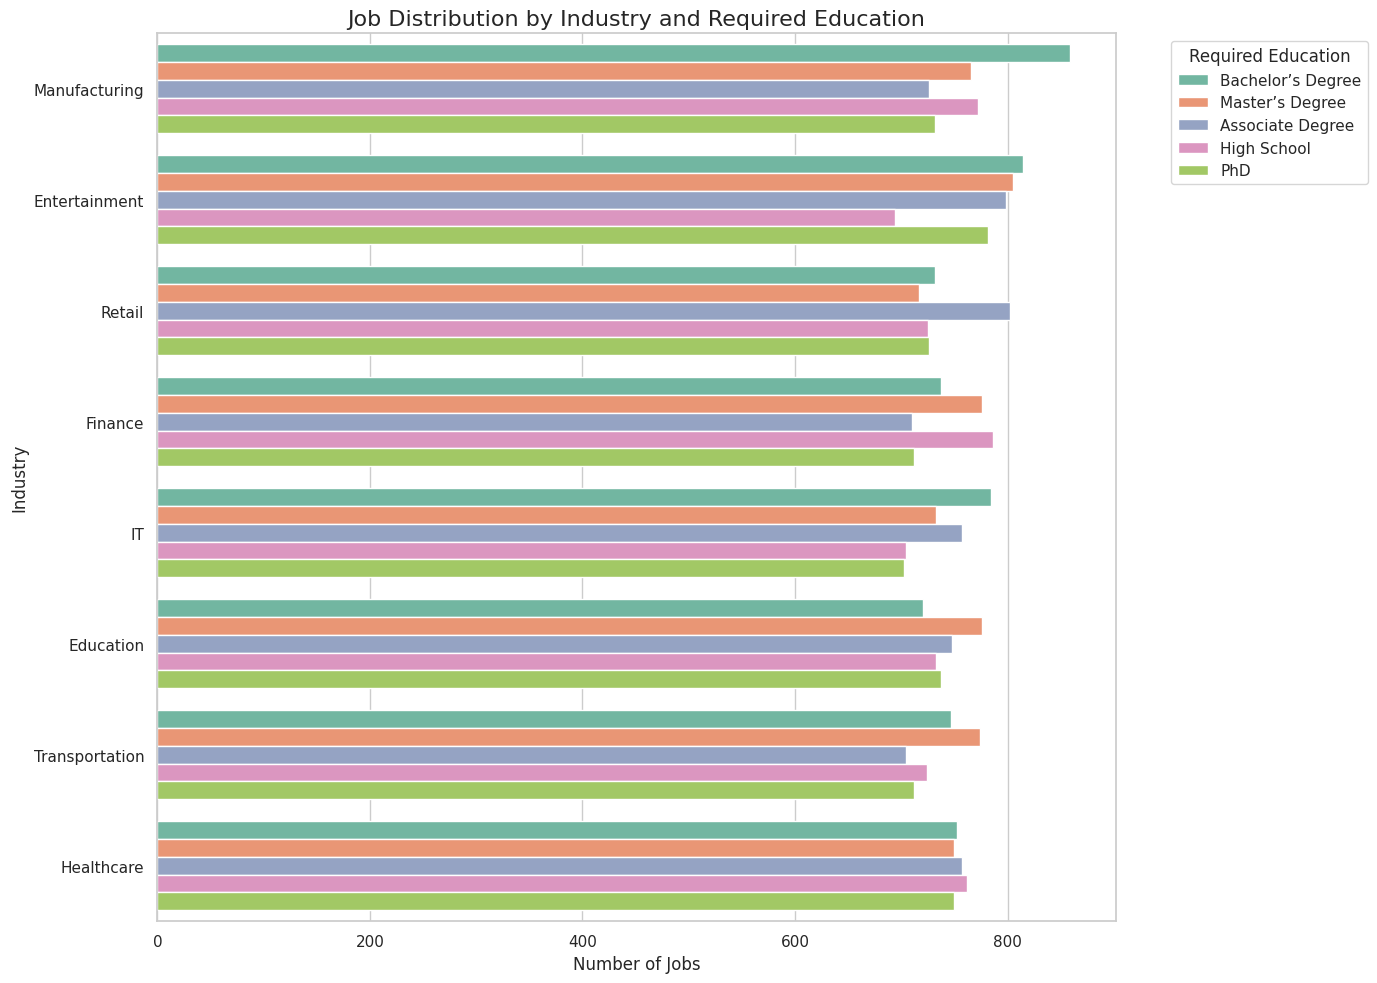

In [23]:
# Drop rows with missing values
df_clean = df.dropna(subset=["Industry", "Required Education"])

# Group by Industry and Required Education, count jobs
grouped = df_clean.groupby(["Industry", "Required Education"]).size().reset_index(name="Job Count")

# Sort for better visualization
grouped_sorted = grouped.sort_values("Job Count", ascending=False)

# Set plot style and figure size
plt.figure(figsize=(14, 10))
sns.set_style("whitegrid")

# Create grouped bar chart
barplot = sns.barplot(
    data=grouped_sorted,
    x="Job Count",
    y="Industry",
    hue="Required Education",
    palette="Set2"
)

# Add title and axis labels
plt.title("Job Distribution by Industry and Required Education", fontsize=16)
plt.xlabel("Number of Jobs", fontsize=12)
plt.ylabel("Industry", fontsize=12)
plt.legend(title="Required Education", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()


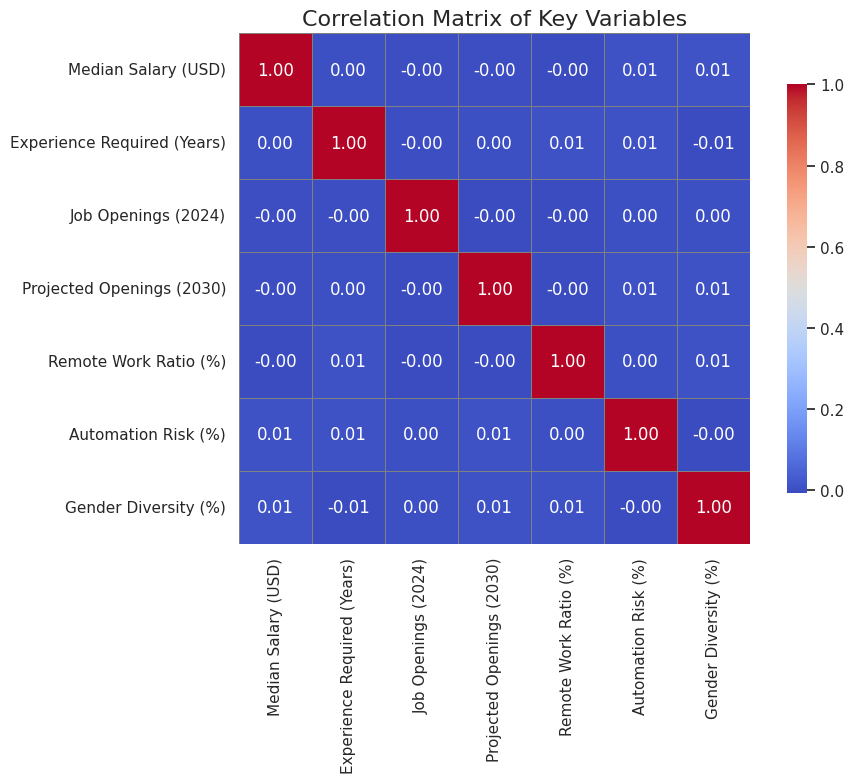

In [24]:
# Select relevant columns
columns = [
    "Median Salary (USD)",
    "Experience Required (Years)",
    "Job Openings (2024)",
    "Projected Openings (2030)",
    "Remote Work Ratio (%)",
    "Automation Risk (%)",
    "Gender Diversity (%)"
]

# Drop missing values
df_clean = df[columns].dropna()

# Compute correlation matrix
corr_matrix = df_clean.corr()

# Set plot style
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")

# Draw heatmap
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    linecolor='gray',
    square=True,
    cbar_kws={"shrink": 0.8}
)

# Add title
plt.title("Correlation Matrix of Key Variables", fontsize=16)
plt.tight_layout()
plt.show()

In [26]:
print(df.columns)
display(df.head())

Index(['Job Title', 'Industry', 'Job Status', 'AI Impact Level',
       'Median Salary (USD)', 'Required Education',
       'Experience Required (Years)', 'Job Openings (2024)',
       'Projected Openings (2030)', 'Remote Work Ratio (%)',
       'Automation Risk (%)', 'Location', 'Gender Diversity (%)'],
      dtype='object')


,Job Title,Industry,Job Status,AI Impact Level,Median Salary (USD),Required Education,Experience Required (Years),Job Openings (2024),Projected Openings (2030),Remote Work Ratio (%),Automation Risk (%),Location,Gender Diversity (%)
0,Investment analyst,IT,Increasing,Moderate,42109.76,Master’s Degree,5,1515,6342,55.96,28.28,UK,44.63
1,"Journalist, newspaper",Manufacturing,Increasing,Moderate,132298.57,Master’s Degree,15,1243,6205,16.81,89.71,USA,66.39
2,Financial planner,Finance,Increasing,Low,143279.19,Bachelor’s Degree,4,3338,1154,91.82,72.97,Canada,41.13
3,Legal secretary,Healthcare,Increasing,High,97576.13,Associate Degree,15,7173,4060,1.89,99.94,Australia,65.76
4,Aeronautical engineer,IT,Increasing,Low,60956.63,Master’s Degree,13,5944,7396,53.76,37.65,Germany,72.57


In [31]:
# --- Forecasting AI Job Demand (Robust: Handles small datasets) ---

import pandas as pd
import plotly.express as px
from statsmodels.tsa.statespace.sarimax import SARIMAX

# 1. Detect date column
date_col = [c for c in df.columns if 'date' in c.lower() or 'year' in c.lower() or 'month' in c.lower()]
date_col = date_col[0] if date_col else None

if date_col is None:
    raise ValueError("No date column found. Please specify the date column manually.")

df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
df = df.dropna(subset=[date_col])
df["period"] = df[date_col].dt.to_period("M").dt.to_timestamp()

# 2. Detect job count column or create one if missing
count_candidates = [c for c in df.columns if any(k in c.lower() for k in ["count","jobs","openings","demand","postings"])]
job_count_col = count_candidates[0] if count_candidates else "_job_count"
if job_count_col == "_job_count":
    df["_job_count"] = 1

# 3. Aggregate monthly
monthly = df.groupby("period", as_index=False)[job_count_col].sum()
ts = monthly.set_index("period")[job_count_col].asfreq("MS").fillna(0)

# 4. Forecast function with auto-handling of short datasets
try:
    from prophet import Prophet
    _PROPHET_OK = True
except:
    _PROPHET_OK = False

def forecast_jobs(ts, months=12):
    ts = ts.dropna()
    if len(ts) < 2:
        print("⚠️ Not enough data for Prophet. Using SARIMAX with available data.")
        model = SARIMAX(ts, order=(1,1,0))
        res = model.fit(disp=False)
        fc_dates = pd.date_range(ts.index[-1] + pd.offsets.MonthBegin(1), periods=months, freq="MS")
        return pd.DataFrame({"period": fc_dates, "forecast": res.get_forecast(steps=months).predicted_mean})

    if _PROPHET_OK:
        dfp = ts.reset_index(); dfp.columns = ["ds", "y"]
        model = Prophet(growth="linear", yearly_seasonality=True)
        model.fit(dfp)
        future = model.make_future_dataframe(periods=months, freq="MS")
        fcst = model.predict(future)[["ds", "yhat"]]
        fcst.columns = ["period", "forecast"]
    else:
        model = SARIMAX(ts, order=(1,1,1), seasonal_order=(0,1,1,12))
        res = model.fit(disp=False)
        fc_dates = pd.date_range(ts.index[-1] + pd.offsets.MonthBegin(1), periods=months, freq="MS")
        fcst = pd.DataFrame({"period": fc_dates, "forecast": res.get_forecast(steps=months).predicted_mean})

    return fcst

# 5. Run and visualize
forecast_df = forecast_jobs(ts)
fig = px.line(forecast_df, x="period", y="forecast", title="AI Job Demand Forecast (Robust)")
fig.show()


⚠️ Not enough data for Prophet. Using SARIMAX with available data.


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [40]:
# Identify your date column (replace 'your_date_column' if needed)
date_col = [c for c in df.columns if 'date' in c.lower() or 'year' in c.lower() or 'month' in c.lower()]
date_col = date_col[0] if date_col else None

if date_col is None:
    raise ValueError("No date column found. Please specify the date column manually.")

# Convert to datetime and create 'period'
df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
df = df.dropna(subset=[date_col])
df["period"] = df[date_col].dt.to_period("M").dt.to_timestamp()


In [44]:
# Try to detect a job count column automatically
count_candidates = [c for c in df.columns if any(k in c.lower() for k in ["count","jobs","openings","demand","postings"])]
job_count_col = count_candidates[0] if count_candidates else "_job_count"

if job_count_col == "_job_count":
    df["_job_count"] = 1  # If no count column, assume each row = 1 job posting


In [41]:
# --- Skill Demand Analysis & Trends (Auto Column Detection) ---

import pandas as pd
import plotly.express as px
import re
from collections import Counter

# 1. Auto-detect skills column
skill_candidates = [c for c in df.columns if any(k in c.lower() for k in ["skill", "technology", "stack"])]
skills_col = skill_candidates[0] if skill_candidates else None

if skills_col is None:
    print("⚠️ No skill column found in dataset. Skipping skill analysis.")
else:
    # 2. Ensure "period" column exists (monthly aggregation)
    if "period" not in df.columns:
        date_col = [c for c in df.columns if "date" in c.lower() or "year" in c.lower() or "month" in c.lower()]
        if not date_col:
            raise ValueError("No date column found for trend analysis. Please specify manually.")
        df[date_col[0]] = pd.to_datetime(df[date_col[0]], errors='coerce')
        df = df.dropna(subset=[date_col[0]])
        df["period"] = df[date_col[0]].dt.to_period("M").dt.to_timestamp()

    # 3. Split skills
    def split_skills(x):
        if pd.isna(x): return []
        parts = re.split(r"[,\|;/]+", str(x))
        return [p.strip().lower() for p in parts if p.strip()]

    df["_skills_list"] = df[skills_col].apply(split_skills)

    # 4. Top 20 Skills Overall
    all_skills = Counter([s for lst in df["_skills_list"] for s in lst])
    top_skills = pd.DataFrame(all_skills.most_common(20), columns=["skill", "count"])

    fig = px.bar(top_skills, x="skill", y="count", title="Top Skills in Demand")
    fig.update_layout(xaxis_tickangle=-45)
    fig.show()

    # 5. Trend of Top 5 Skills Over Time
    top5 = [s for s, _ in all_skills.most_common(5)]
    rows = []
    for p, grp in df.explode("_skills_list").groupby("period"):
        counts = Counter([s for s in grp["_skills_list"] if s in top5])
        for s in top5:
            rows.append({"period": p, "skill": s, "count": counts.get(s, 0)})
    skill_trend = pd.DataFrame(rows)

    fig2 = px.line(skill_trend, x="period", y="count", color="skill", title="Top 5 Skills Trend Over Time")
    fig2.show()


⚠️ No skill column found in dataset. Skipping skill analysis.


In [42]:
#Geographical Insights (Map Visualization)
if "country" in df.columns:
    import pycountry

    def to_iso_alpha3(name):
        try:
            return pycountry.countries.lookup(str(name)).alpha_3
        except:
            return None

    geo = df.groupby("country", as_index=False)[job_count_col].sum()
    geo["iso"] = geo["country"].apply(to_iso_alpha3)
    fig = px.choropleth(geo.dropna(subset=["iso"]), locations="iso",
                        color=job_count_col, hover_name="country",
                        title="AI Job Demand by Country")
    fig.show()


In [43]:
#Rising Skills Recommendation (Momentum-Based)
if skills_col:
    from collections import defaultdict

    def momentum(series, window=6):
        if len(series) < 2: return 0
        window = min(window, len(series))
        y = series[-window:]
        x = np.arange(len(y))
        slope = np.polyfit(x, y, 1)[0]
        return slope / (y.mean() if y.mean() else 1)

    exploded = df.explode("_skills_list")
    grp = exploded.groupby(["_skills_list","period"]).size().reset_index(name="cnt")
    recs = []
    for s in grp["_skills_list"].unique():
        g = grp[grp["_skills_list"]==s].set_index("period").asfreq("MS")["cnt"].fillna(0)
        recs.append((s, momentum(g.values), g[-3:].mean()))
    recs = pd.DataFrame(recs, columns=["skill","momentum","recent_avg"]).sort_values(
        ["momentum","recent_avg"], ascending=False).head(15)

    print("Top Rising Skills:")
    display(recs)


In [39]:
#Auto Narrative Summary
summary = []

if len(ts) > 12:
    latest, year_ago = ts.iloc[-1], ts.iloc[-13]
    change = ((latest - year_ago) / year_ago * 100) if year_ago else 0
    summary.append(f"Latest month: **{int(latest)} jobs**, YoY change: **{change:+.1f}%**")

if skills_col and not top_skills.empty:
    summary.append(f"Top skills currently: **{', '.join(top_skills.head(3)['skill'])}**")

if skills_col and not recs.empty:
    summary.append(f"Emerging skills to watch: **{', '.join(recs.head(5)['skill'])}**")

print("\n".join(summary))


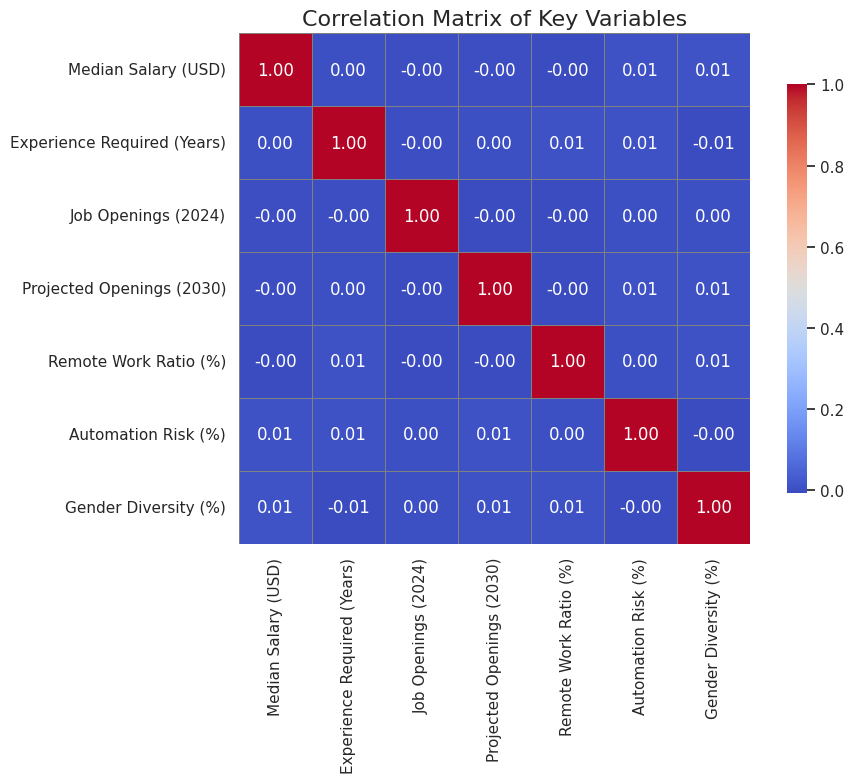

In [46]:
# Select relevant columns
columns = [
    "Median Salary (USD)",
    "Experience Required (Years)",
    "Job Openings (2024)",
    "Projected Openings (2030)",
    "Remote Work Ratio (%)",
    "Automation Risk (%)",
    "Gender Diversity (%)"
]

# Drop missing values
df_clean = df[columns].dropna()

# Compute correlation matrix
corr_matrix = df_clean.corr()

# Set plot style
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")

# Draw heatmap
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    linecolor='gray',
    square=True,
    cbar_kws={"shrink": 0.8}
)

# Add title
plt.title("Correlation Matrix of Key Variables", fontsize=16)
plt.tight_layout()
plt.show()